### Parte a

Se tiene que el ISP=11.7%, la entidad tiene una cartera de crédito con saldo de 8050 millones y rendimiento neto de 3%, además una cartera de inversiones valorada en 976 millones con rendimiento neto del 1%.

In [2]:
CB=1150
RC=8905
RP=72.3
RO=15.2
RTC=4.7

In [12]:
Rend = 0.03*8050 + 0.01*976
print(Rend)

251.26


Las pérdidas siguen una distribución Gamma de media 80.5 y desviación estándar 87.2, lo que nos permite calcular que esta es una Gamma de parámetros forma=0.852 y escala=94.46, aproximadamente

In [24]:
from scipy.stats import gamma

mu = 80.5
sd = 87.2

alpha = (mu ** 2) / (sd ** 2)
beta = (sd ** 2) / mu

perd_max = gamma.ppf(0.99, alpha, scale=beta)
print(perd_max)

402.18121879558777


Entonces incluyendo los ingresos y las pérdidas más altas que se pueden esperar, se puede llegar a tener un ISP de

In [30]:
CBnew= CB+Rend-perd_max
RCnew=RC+perd_max*0.1

ISP_min = CBnew/(RCnew + 10*(RP+RO+RTC))
print(ISP_min)

0.1012523255150361


### Parte b

In [47]:
X = (CB+Rend-(0.1*RC+RP+RO+RTC))/1.01
print(X)

414.4158415841584


In [50]:
1-gamma.cdf(414, alpha, scale=beta)

0.00879229825801564

Por tanto, la probabilidad de tener un ISP menor a 0.1 es de 0.88%

### Parte c

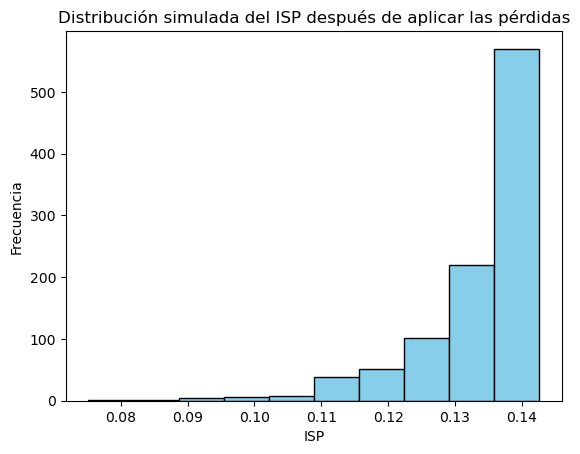

ISP que se puede esperar: 0.13405603885674908


In [55]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
perd_sim = gamma.rvs(alpha, scale=beta, size=n)

CBnew= CB+Rend-perd_sim
RCnew=RC+perd_sim*0.1

ISP_sim =  CBnew/(RCnew + 10*(RP+RO+RTC)) 
# Análisis de la distribución de ISP simulada
plt.hist(ISP_sim, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución simulada del ISP después de aplicar las pérdidas')
plt.xlabel('ISP')
plt.ylabel('Frecuencia')
plt.show()

print("ISP que se puede esperar:", np.mean(ISP_sim))

